# R - Plots

In [1]:
library('magrittr')
library('dplyr')

crimerate <- read.csv2(paste('crimerates-by-state-2005.csv',sep=''), header=TRUE, sep=',', fill=TRUE, stringsAsFactors=FALSE) %>% 
  dplyr::mutate(murder = as.numeric(murder),
                forcible_rape = as.numeric(forcible_rape),
                robbery = as.numeric(robbery),
                aggravated_assault = as.numeric(aggravated_assault),
                burglary = as.numeric(burglary),
                larceny_theft = as.numeric(larceny_theft),
                motor_vehicle_theft = as.numeric(motor_vehicle_theft),
                population = as.integer(population),
                total_crime = murder+
                  forcible_rape+
                  robbery+
                  aggravated_assault+
                  burglary+
                  larceny_theft+
                  motor_vehicle_theft,
                state_cont = rank(state, ties.method = 'first'))

head(crimerate)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population,total_crime,state_cont
United States,5.6,31.7,140.7,291.1,726.7,2286.3,416.7,295753151,3898.8,45
Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4545049,4323.8,1
Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,669488,4244.5,2
Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,5974834,5351.1,3
Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2776221,4585.4,4
California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,35795255,3848.9,5


In [2]:
state_detail <- xlsx::read.xlsx2(paste("states_detail.xlsx",sep=''),sheetIndex = 1, stringsAsFactors = FALSE)
   
state_detail = rename(state_detail, "state"="full_name")
state_detail

name_caps,state,abbr,region
ALABAMA,Alabama,AL,Rest of USA
ALASKA,Alaska,AK,Rest of USA
ARIZONA,Arizona,AZ,Rest of USA
ARKANSAS,Arkansas,AR,Rest of USA
CALIFORNIA,California,CA,Rest of USA
COLORADO,Colorado,CO,Rest of USA
CONNECTICUT,Connecticut,CT,Rest of USA
DELAWARE,Delaware,DE,Rest of USA
FLORIDA,Florida,FL,Rest of USA
GEORGIA,Georgia,GA,Rest of USA


In [3]:
state_detail <- mutate(state_detail, midwest = case_when(state_detail['region'] == 'MidWest' ~ "1",state_detail['region'] == 'Rest of USA' ~ "0"))
state_detail

name_caps,state,abbr,region,midwest
ALABAMA,Alabama,AL,Rest of USA,0
ALASKA,Alaska,AK,Rest of USA,0
ARIZONA,Arizona,AZ,Rest of USA,0
ARKANSAS,Arkansas,AR,Rest of USA,0
CALIFORNIA,California,CA,Rest of USA,0
COLORADO,Colorado,CO,Rest of USA,0
CONNECTICUT,Connecticut,CT,Rest of USA,0
DELAWARE,Delaware,DE,Rest of USA,0
FLORIDA,Florida,FL,Rest of USA,0
GEORGIA,Georgia,GA,Rest of USA,0


In [4]:
# Remove USA as a state and add region
crimerate_states <- crimerate %>% 
  dplyr::left_join(state_detail, by='state') %>% 
  dplyr::filter(state !='United States') %>%
  dplyr::mutate(midwest = as.integer(midwest))


crimerate_states[is.na(crimerate_states)] <- 0


head(crimerate_states)

state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population,total_crime,state_cont,name_caps,abbr,region,midwest
Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4545049,4323.8,1,ALABAMA,AL,Rest of USA,0
Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,669488,4244.5,2,ALASKA,AK,Rest of USA,0
Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,5974834,5351.1,3,ARIZONA,AZ,Rest of USA,0
Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2776221,4585.4,4,ARKANSAS,AR,Rest of USA,0
California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,35795255,3848.9,5,CALIFORNIA,CA,Rest of USA,0
Colorado,3.7,43.4,84.6,264.7,744.8,2735.2,559.5,4660780,4435.9,6,COLORADO,CO,Rest of USA,0


## R - Scatter Plot

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


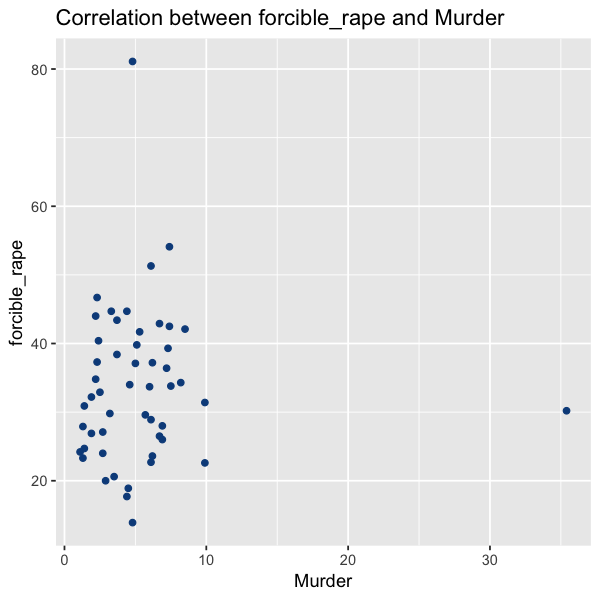

In [5]:
options(repr.plot.width = 5, repr.plot.height = 5)

# Plot scatter plot
ggplot2::ggplot(data = crimerate_states) +
  ggplot2::aes(x = murder, y = forcible_rape) +
  ggplot2::geom_point(color = "#0c4c8a") +
  ggplot2::labs(title = "Correlation between forcible_rape and Murder",
       x = "Murder",
       y = "forcible_rape") +
  ggplot2::theme_grey()

## R - Bubble chart

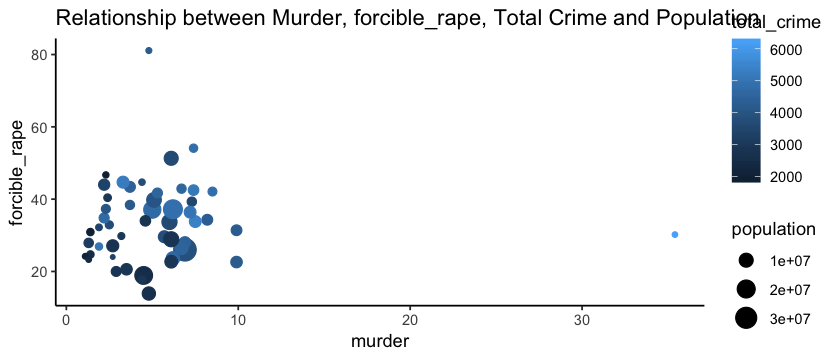

In [6]:
# Format graph size
options(repr.plot.width = 7, repr.plot.height = 3)

# Plot bubble chart
ggplot2::ggplot(data = crimerate_states) +
  ggplot2::aes(x = murder, y = forcible_rape, color = total_crime, size = population) +
  ggplot2::geom_point() +
  ggplot2::labs(title = "Relationship between Murder, forcible_rape, Total Crime and Population") +
  ggplot2::theme_classic()

## R - Density Plot

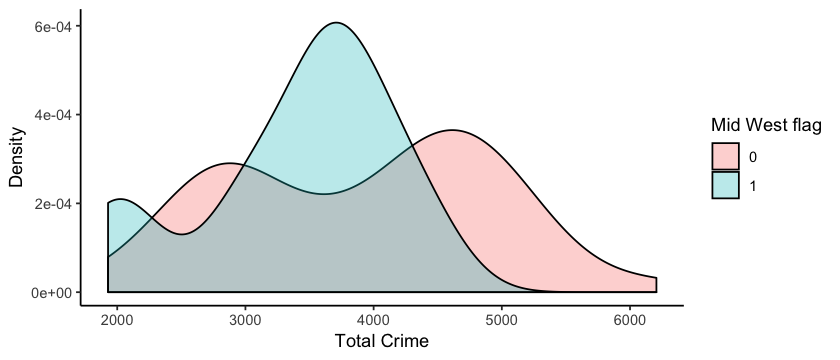

In [7]:
# Comparing total crime rate of mid west states to the rest of the states
crimerate_compare <- crimerate_states[,-1]
rownames(crimerate_compare) <- crimerate_states[,1]

ggplot2::ggplot(crimerate_compare) +
  ggplot2::aes(total_crime, fill=as.factor(crimerate_compare$midwest)) +
  ggplot2::geom_density(alpha = 0.3) +
  ggplot2::labs(x='Total Crime', y='Density') +
  ggplot2::theme_classic() +
  ggplot2::guides(fill=ggplot2::guide_legend(title="Mid West flag"))